<a href="https://colab.research.google.com/github/MueezAmj/A2_ML2_Bayes/blob/dev/ML_Assignment1_sem2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
business_data = pd.read_csv('/content/drive/MyDrive/yelp_academic_dataset_business.csv')
review_data = pd.read_csv('/content/drive/My Drive/yelp_academic_dataset_review.csv')
user_data = pd.read_csv('/content/drive/My Drive/yelp_academic_dataset_user.csv')
checkin_data = pd.read_csv('/content/drive/My Drive/yelp_academic_dataset_checkin.csv')
tip_data = pd.read_csv('/content/drive/My Drive/yelp_academic_dataset_tip.csv')

<ipython-input-7-5440cb6c1b23>:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  user_data = pd.read_csv('/content/drive/My Drive/yelp_academic_dataset_user.csv')


BUSINESS DATA

In [8]:
business_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [9]:
business_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       145219 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150273 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [10]:
business_data.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


In [11]:
business_data.isnull()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,False,False,False,False,False,False,False,False,False,False,False,False,False,False
150342,False,False,False,False,False,False,False,False,False,False,False,False,False,False
150343,False,False,False,False,False,False,False,False,False,False,False,False,False,True
150344,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
print(business_data.isnull().sum())


business_id         0
name                0
address          5127
city                0
state               0
postal_code        73
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64


Columns with No Missing Values: business_id, name, city, state, latitude, longitude, stars, review_count, and is_open do not have missing values, so no action is needed for them.

Columns with High Missing Values: attributes (13744 missing values) and hours (23223 missing values): These columns have a substantial number of missing values, and imputing them might introduce too much noise.

Columns with Moderate Missing Values: postal_code (73 missing values), categories (103 missing values): Since this is an important feature, it’s better to impute or remove these missing row, address (5127 missing values):

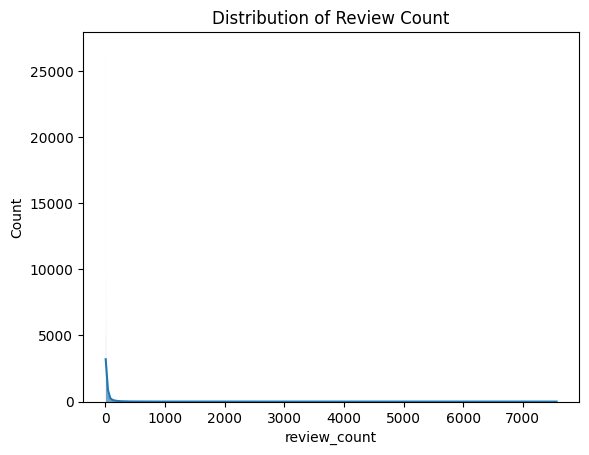

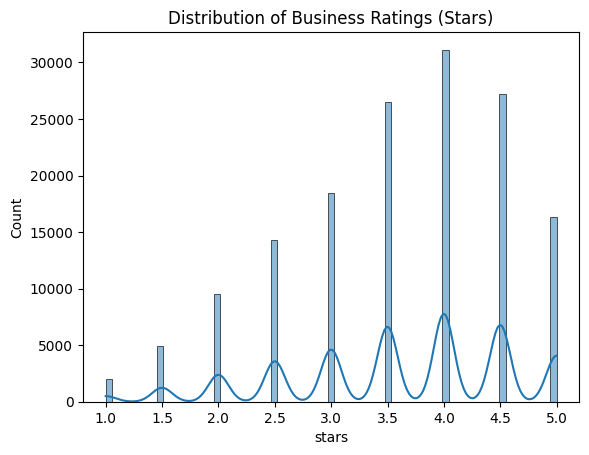

In [14]:
# Visualize the distribution of numerical features
sns.histplot(business_data['review_count'], kde=True)
plt.title('Distribution of Review Count')
plt.show()

sns.histplot(business_data['stars'], kde=True)
plt.title('Distribution of Business Ratings (Stars)')
plt.show()

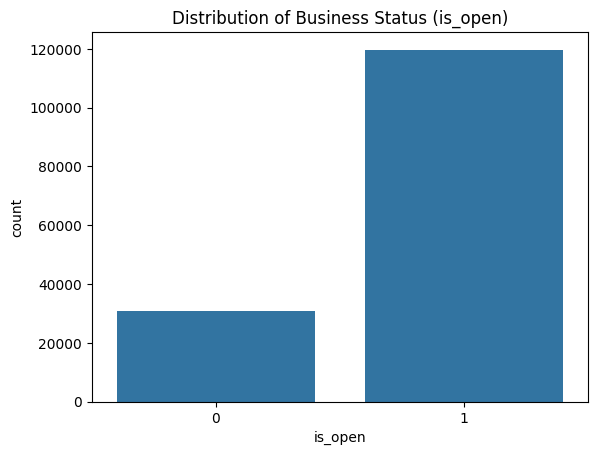

is_open
1    79.615021
0    20.384979
Name: proportion, dtype: float64


In [15]:
# Explore the target variable 'is_open'
sns.countplot(x='is_open', data=business_data)
plt.title("Distribution of Business Status (is_open)")
plt.show()

# Check the percentage distribution
print(business_data['is_open'].value_counts(normalize=True) * 100)

<ipython-input-16-b35d8247bb94>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=categories_count.index, x=categories_count.values, palette='viridis')


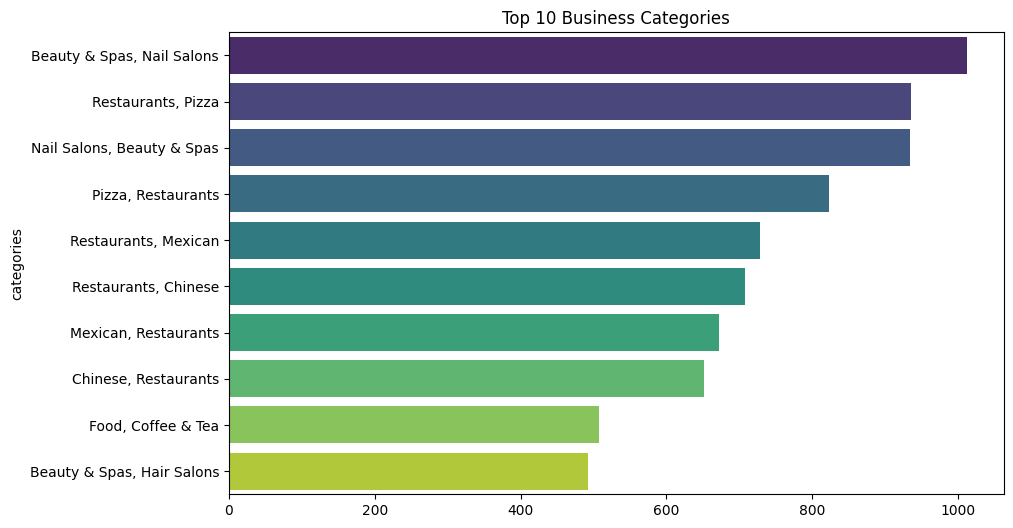

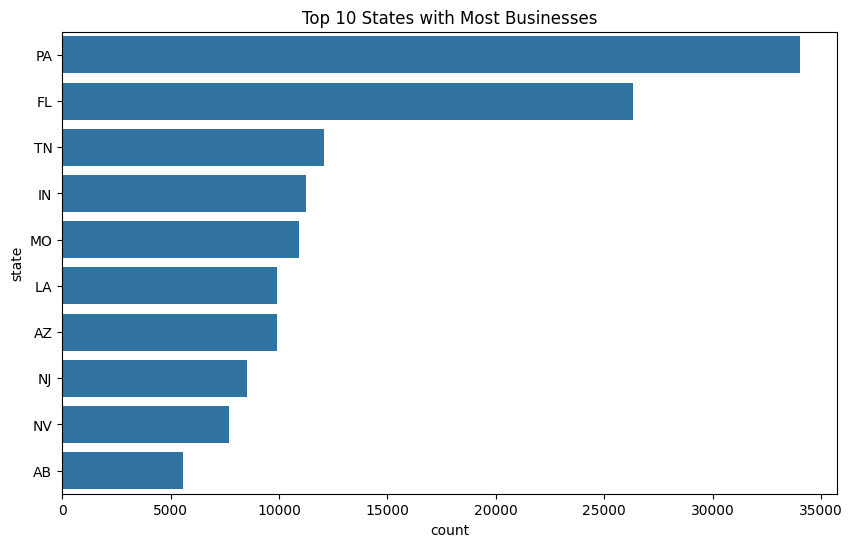

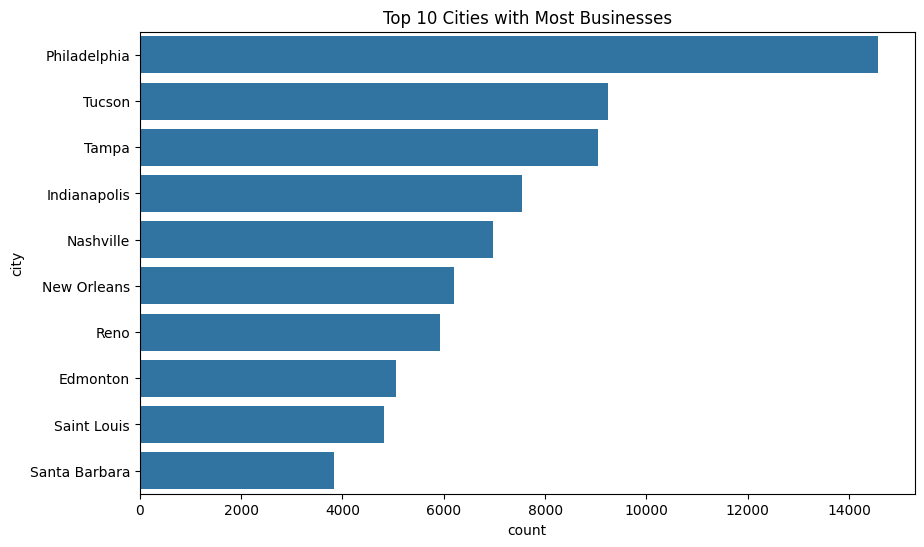

In [16]:
# Explore 'categories' column (Top categories)
categories_count = business_data['categories'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=categories_count.index, x=categories_count.values, palette='viridis')
plt.title('Top 10 Business Categories')
plt.show()

# Explore 'state' and 'city' columns
plt.figure(figsize=(10,6))
sns.countplot(y='state', data=business_data, order=business_data['state'].value_counts().head(10).index)
plt.title("Top 10 States with Most Businesses")
plt.show()

# City
plt.figure(figsize=(10,6))
sns.countplot(y='city', data=business_data, order=business_data['city'].value_counts().head(10).index)
plt.title("Top 10 Cities with Most Businesses")
plt.show()

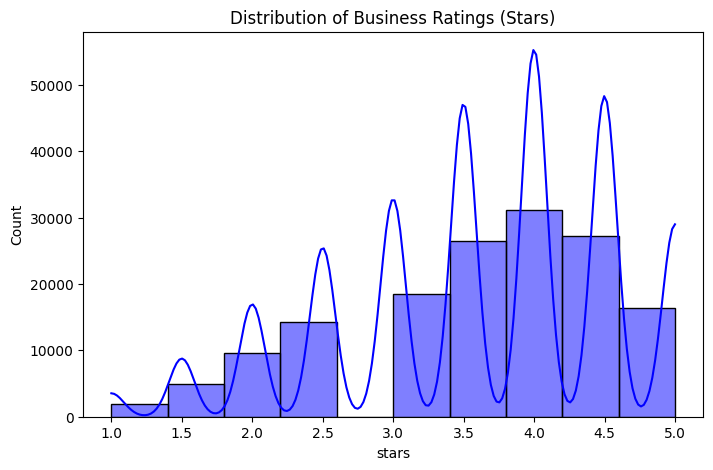

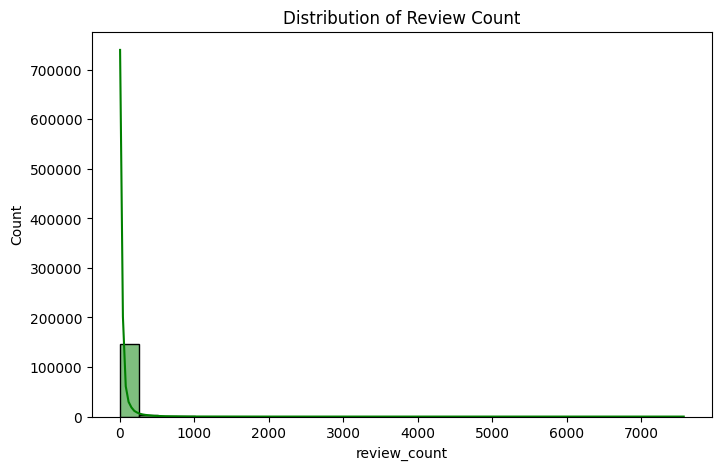

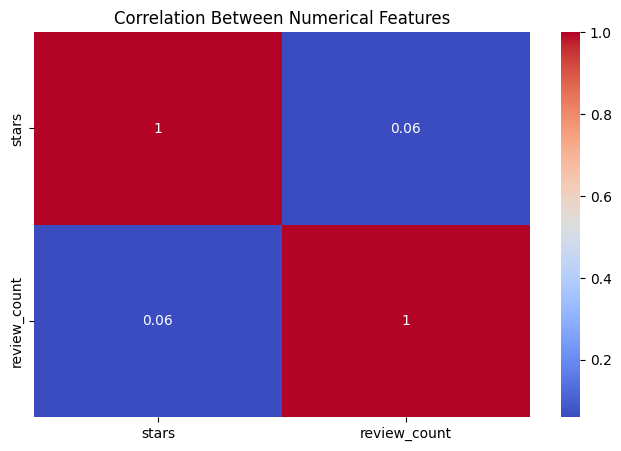

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(business_data['stars'], kde=True, bins=10, color='blue')
plt.title('Distribution of Business Ratings (Stars)')
plt.show()

# Distribution of 'review_count'
plt.figure(figsize=(8,5))
sns.histplot(business_data['review_count'], kde=True, bins=30, color='green')
plt.title('Distribution of Review Count')
plt.show()

# Check correlation between numerical features
plt.figure(figsize=(8,5))
sns.heatmap(business_data[['stars', 'review_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

Missing Values: Columns like attributes and hours had a significant amount of missing data, Minor missing values in address, postal_code, and categories were handled by either filling or removing rows.

Categorical Features: The categories column shows the types of businesses, and we focused on creating a binary feature for identifying restaurants (is_restaurant). The state and city columns had to be label encoded for machine learning algorithms.

Numerical Features: The distribution of stars (ratings) is relatively normal, while review_count is heavily skewed, with most businesses having a low number of reviews. We scaled both features to normalize them for model training.

CHECKIN DATA

In [18]:
checkin_data.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [19]:
checkin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [20]:
checkin_data.describe()

,business_id,date
count,131930,131930
unique,131930,131930
top,zzyx5x0Z7xXWWvWnZFuxlQ,2015-01-06 17:51:53
freq,1,1


In [21]:
checkin_data.isnull()

,business_id,date
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
131925,False,False
131926,False,False
131927,False,False
131928,False,False


REVIEW DATA

In [25]:
review_data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [26]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   user_id      object
 2   business_id  object
 3   stars        int64 
 4   useful       int64 
 5   funny        int64 
 6   cool         int64 
 7   text         object
 8   date         object
dtypes: int64(4), object(5)
memory usage: 480.0+ MB


In [22]:
review_data.shape


(6990280, 9)

In [23]:
missing_values = review_data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


<ipython-input-24-719fb23edb93>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=review_data, palette='viridis')


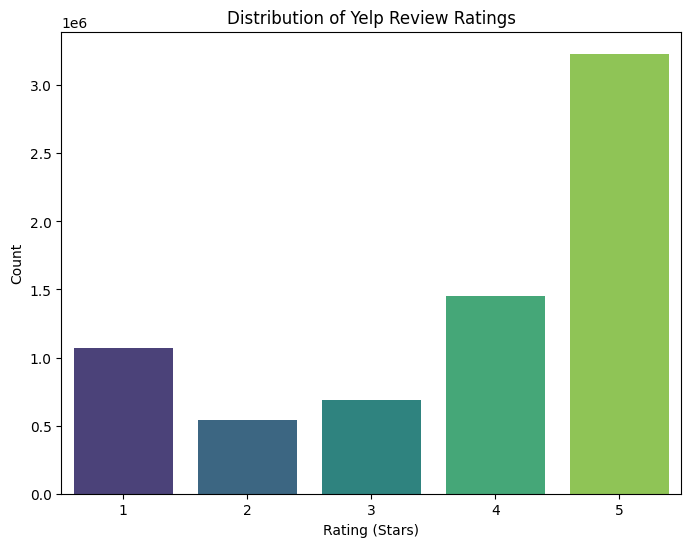

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of review ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='stars', data=review_data, palette='viridis')
plt.title('Distribution of Yelp Review Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Count')
plt.show()

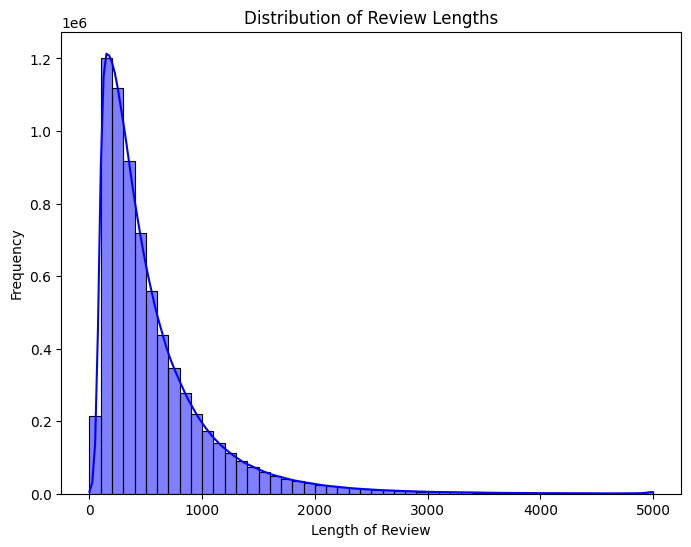

In [28]:
# Calculate the length of each review and store it in a new column
review_data['review_length'] = review_data['text'].apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(8, 6))
sns.histplot(review_data['review_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()

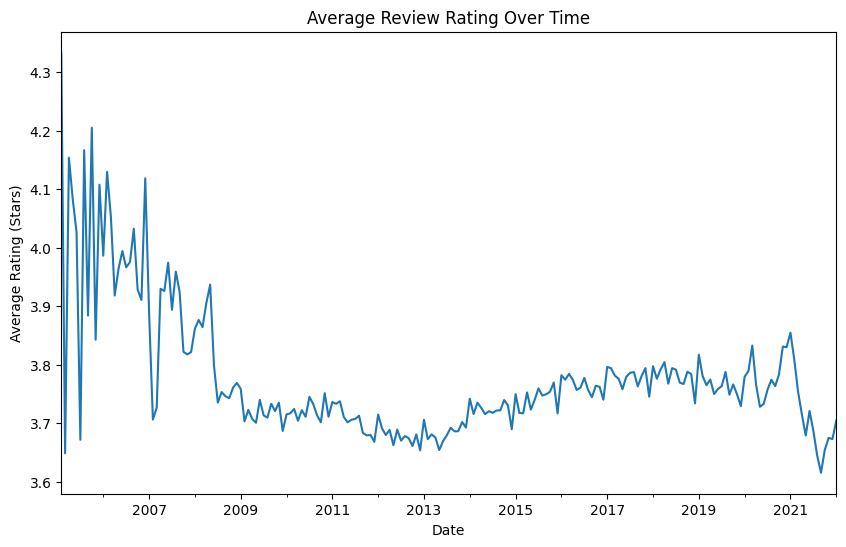

In [29]:
# Convert 'date' column to datetime
review_data['date'] = pd.to_datetime(review_data['date'])

# Plot average review rating over time
plt.figure(figsize=(10, 6))
review_data.resample('M', on='date')['stars'].mean().plot()
plt.title('Average Review Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating (Stars)')
plt.show()

In [35]:
# Top 10 reviewers
top_reviewers = review_data['user_id'].value_counts().head(10)
print(top_reviewers)

# Top 10 businesses with most reviews
top_businesses = review_data['business_id'].value_counts().head(10)
print(top_businesses)

user_id
_BcWyKQL16ndpBdggh2kNA    3048
Xw7ZjaGfr0WNVt6s_5KZfA    1840
0Igx-a1wAstiBDerGxXk2A    1747
-G7Zkl1wIWBBmD0KRy_sCw    1682
ET8n-r7glWYqZhuR6GcdNw    1653
bYENop4BuQepBjM1-BI3fA    1578
1HM81n6n4iPIFU5d2Lokhw    1554
fr1Hz2acAb3OaL3l6DyKNg    1447
wXdbkFZsfDR7utJvbWElyA    1396
Um5bfs5DH6eizgjH3xZsvg    1391
Name: count, dtype: int64
business_id
_ab50qdWOk0DdB6XOrBitw    7673
ac1AeYqs8Z4_e2X5M3if2A    7516
GXFMD0Z4jEVZBCsbPf4CTQ    6160
ytynqOUb3hjKeJfRj5Tshw    5778
oBNrLz4EDhiscSlbOl8uAw    5264
iSRTaT9WngzB8JJ2YKJUig    5254
VQcCL9PiNL_wkGf-uF3fjg    5146
_C7QiQQc47AOEv4PE3Kong    4969
GBTPC53ZrG1ZBY3DT8Mbcw    4661
6a4gLLFSgr-Q6CZXDLzBGQ    4480
Name: count, dtype: int64


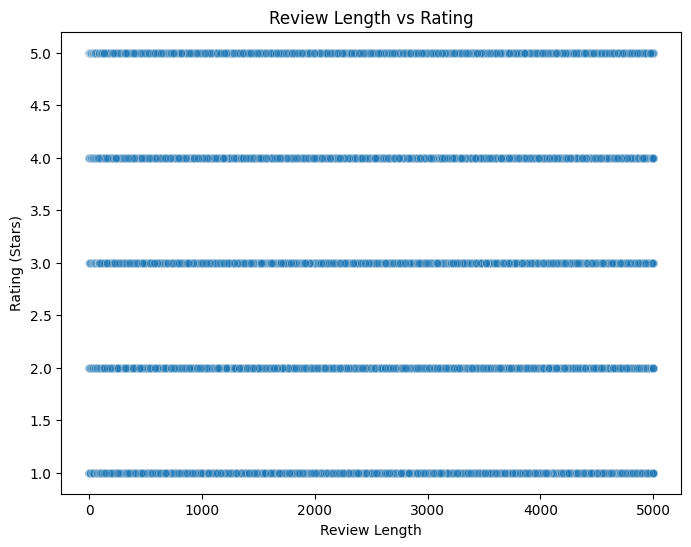

In [36]:
# Plot a scatter plot of review length vs rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='review_length', y='stars', data=review_data, alpha=0.3)
plt.title('Review Length vs Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating (Stars)')
plt.show()

TIP DATA

In [37]:
tip_data.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [38]:
tip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           908915 non-null  object
 1   business_id       908915 non-null  object
 2   text              908901 non-null  object
 3   date              908915 non-null  object
 4   compliment_count  908915 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 34.7+ MB


Observations:tip_data contains columns such as user_id, business_id, text, date, and compliment_count.
Most columns are object types (user_id, business_id, text, date), and compliment_count is a numeric column.

In [40]:
# Check for missing values
tip_data.isnull().sum()

,0
user_id,0
business_id,0
text,14
date,0
compliment_count,0


Findings: We can find that text column has 14 missing values

In [41]:
# Number of unique users
unique_users = tip_data['user_id'].nunique()

# Number of unique businesses
unique_businesses = tip_data['business_id'].nunique()

print(f'Unique users: {unique_users}')
print(f'Unique businesses: {unique_businesses}')

Unique users: 301758
Unique businesses: 106193


Findings: We can find that there are 106193 different businesses

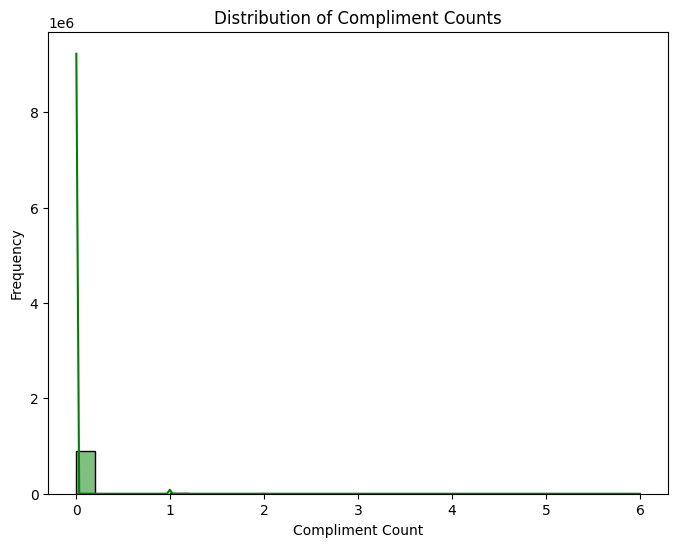

In [42]:
# Plot distribution of compliment_count
plt.figure(figsize=(8, 6))
sns.histplot(tip_data['compliment_count'], bins=30, kde=True, color='green')
plt.title('Distribution of Compliment Counts')
plt.xlabel('Compliment Count')
plt.ylabel('Frequency')
plt.show()

Findings : This distribution tells us that the range of compliment_count, there are very few tips with low compliments.


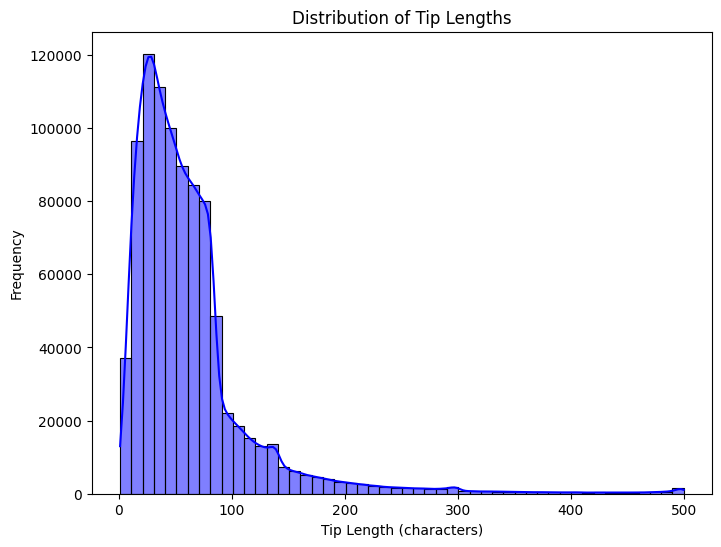

In [44]:
# Create a new column for tip length
tip_data['tip_length'] = tip_data['text'].astype(str).apply(len) # Changed line

# Plot distribution of tip lengths
plt.figure(figsize=(8, 6))
sns.histplot(tip_data['tip_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Tip Lengths')
plt.xlabel('Tip Length (characters)')
plt.ylabel('Frequency')
plt.show()


In [45]:
# Top 10 users by number of tips
top_users = tip_data['user_id'].value_counts().head(10)
print('Top 10 users by number of tips:')
print(top_users)

# Top 10 businesses by number of tips
top_businesses = tip_data['business_id'].value_counts().head(10)
print('Top 10 businesses by number of tips:')
print(top_businesses)

Top 10 users by number of tips:
user_id
fCvMnJU1Z-XhAjKg99wK3Q    4071
5Y5KbsI5buMcNh2hTFaRpA    1385
lMY8NBPyzlPbbu-KBYfD9A    1373
Rr4cLb6Go91FT134o6RsKg    1230
qjfMBIZpQT9DDtw_BWCopQ    1230
-G7Zkl1wIWBBmD0KRy_sCw    1035
sraTrYU-7q_bQ0TxQrLJvQ     902
I2XpWCHAom1JRyHXZQrnfg     821
xWmYN57XXZbg0LOK8WbbFQ     813
zYFGMy1_thjMnvQLX6JNBw     782
Name: count, dtype: int64
Top 10 businesses by number of tips:
business_id
FEXhWNCMkv22qG04E83Qjg    2571
-QI8Qi8XWH3D8y8ethnajA    1011
_ab50qdWOk0DdB6XOrBitw     932
ytynqOUb3hjKeJfRj5Tshw     827
Eb1XmmLWyt_way5NNZ7-Pw     826
c_4c5rJECZSfNgFj7frwHQ     750
ac1AeYqs8Z4_e2X5M3if2A     613
GBTPC53ZrG1ZBY3DT8Mbcw     608
iSRTaT9WngzB8JJ2YKJUig     606
GXFMD0Z4jEVZBCsbPf4CTQ     579
Name: count, dtype: int64


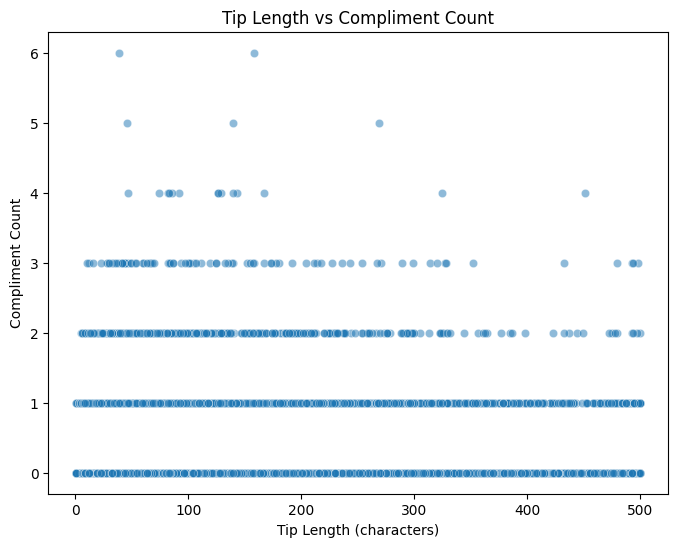

In [46]:
# Scatter plot of tip length vs compliment count
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tip_length', y='compliment_count', data=tip_data, alpha=0.5)
plt.title('Tip Length vs Compliment Count')
plt.xlabel('Tip Length (characters)')
plt.ylabel('Compliment Count')
plt.show()

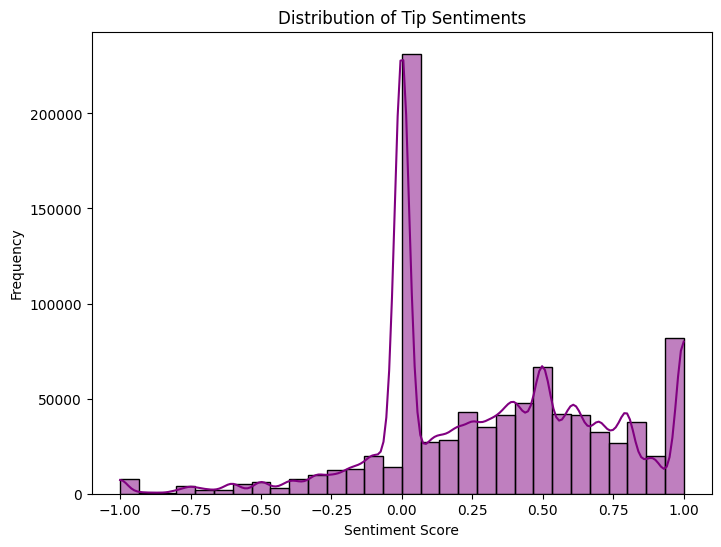

In [49]:
!pip install textblob
# This will install the module textblob
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    # Check if the text is a string before creating a TextBlob object
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        # Return a default value (e.g., 0) for non-string values
        return 0

# Apply the sentiment function to the 'text' column
tip_data['sentiment'] = tip_data['text'].apply(get_sentiment)

# Plot the distribution of sentiment scores
plt.figure(figsize=(8, 6))
sns.histplot(tip_data['sentiment'], bins=30, kde=True, color='purple')
plt.title('Distribution of Tip Sentiments')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

USER DATA

In [50]:
user_data.head()


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,NaN,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [51]:
user_data.shape


(1987897, 22)

In [52]:
user_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


In [53]:
user_data.describe()


,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06
mean,2.339441e+01,4.229634e+01,1.697054e+01,2.379291e+01,1.465740e+00,3.630494e+00,1.807072e+00,2.922631e-01,1.793176e-01,1.336493e-01,6.390723e-02,1.443135e+00,3.011841e+00,2.829308e+00,2.829308e+00,1.056448e+00,1.226859e+00
std,8.256699e+01,6.414806e+02,4.078034e+02,5.653513e+02,1.813075e+01,1.183337e+00,7.360184e+01,1.282467e+01,1.515525e+01,1.135682e+01,1.004363e+01,6.016790e+01,1.193898e+02,9.666385e+01,9.666385e+01,3.217973e+01,9.515751e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.880000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.700000e+01,1.300000e+01,2.000000e+00,3.000000e+00,0.000000e+00,4.560000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.747300e+04,2.062960e+05,1.858230e+05,1.998780e+05,1.249700e+04,5.000000e+00,2.578400e+04,1.350100e+04,1.418000e+04,1.365400e+04,1.266900e+04,5.903100e+04,1.010970e+05,4.996700e+04,4.996700e+04,1.593400e+04,8.263000e+04


Findings: The dataset contains columns like user_id, name, review_count, yelping_since, useful, funny, cool, elite, friends, fans, and average_stars.
Most columns are numerical (review_count, useful, funny, cool, etc.), while some are categorical (elite, friends).

In [54]:
# Check for missing values
user_data.isnull().sum()

,0
user_id,0
name,37
review_count,0
yelping_since,0
useful,0
funny,0
cool,0
elite,1896699
friends,878551
fans,0


Findings: The columns elite and friends has the maximum number of missing values , hence should be checked and dropped if needed

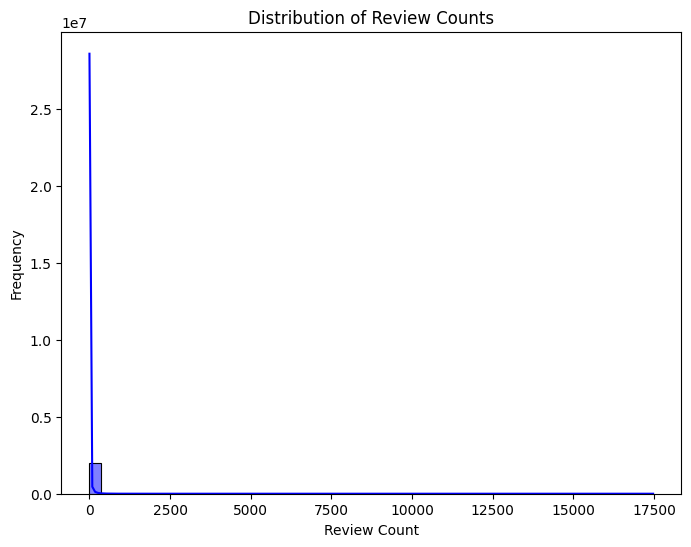

In [55]:
# Plot the distribution of review counts
plt.figure(figsize=(8, 6))
sns.histplot(user_data['review_count'], bins=50, kde=True, color='blue')
plt.title('Distribution of Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.show()

Findings: This shows that less users post small number of reviews less frequently.


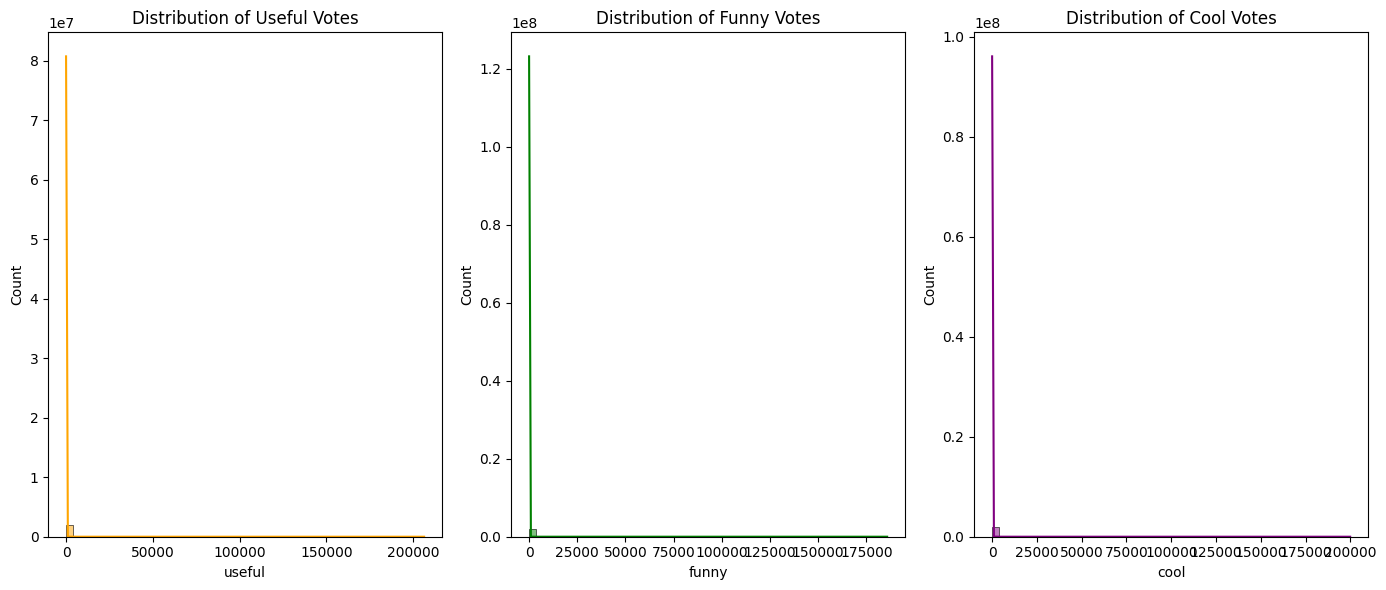

In [56]:
# Plot distribution of 'useful', 'funny', and 'cool' votes
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(user_data['useful'], bins=50, kde=True, color='orange')
plt.title('Distribution of Useful Votes')

plt.subplot(1, 3, 2)
sns.histplot(user_data['funny'], bins=50, kde=True, color='green')
plt.title('Distribution of Funny Votes')

plt.subplot(1, 3, 3)
sns.histplot(user_data['cool'], bins=50, kde=True, color='purple')
plt.title('Distribution of Cool Votes')

plt.tight_layout()
plt.show()

Findings : We can analyze the distribution of these votes to understand how users interact with reviews and how often their reviews are marked as useful, funny, or cool. We can see that all the distributions are very small with very less users giving reviews very less frequently



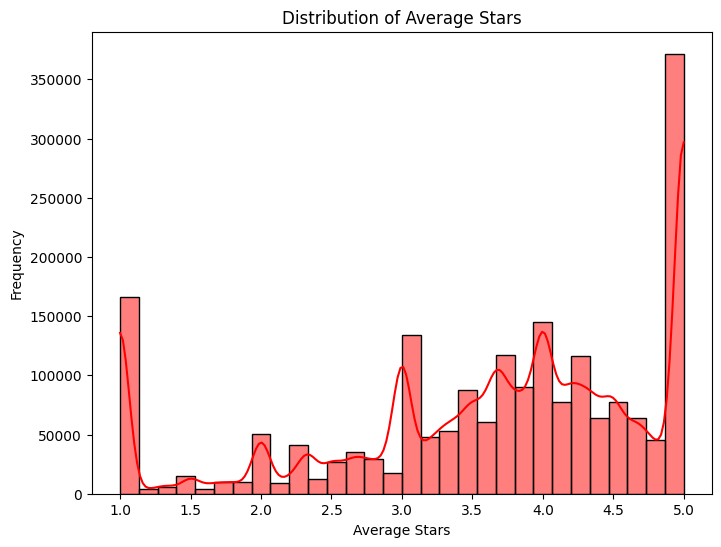

In [57]:
# Plot the distribution of average stars
plt.figure(figsize=(8, 6))
sns.histplot(user_data['average_stars'], bins=30, kde=True, color='red')
plt.title('Distribution of Average Stars')
plt.xlabel('Average Stars')
plt.ylabel('Frequency')
plt.show()

Findings: We can find that most of the customers tend to give the 5 star rating which can indirectly tell us that most customers are very genorous while rating.